In [ ]:
!pip install pandas matplotlib networkx nxviz

     |████████████████████████████████| 225kB 5.4MB/s 
     |████████████████████████████████| 215kB 7.0MB/s 
     |████████████████████████████████| 81kB 5.8MB/s 
     |████████████████████████████████| 61kB 5.0MB/s 
     |████████████████████████████████| 583kB 6.1MB/s 
     |████████████████████████████████| 276kB 13.5MB/s 
     |████████████████████████████████| 2.3MB 12.3MB/s 
     |████████████████████████████████| 266kB 31.1MB/s 
     |████████████████████████████████| 112kB 39.3MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.1.2-cp36-cp36m-linux_x86_64.whl size=44105 sha256=1344ad4e5475e3acc329bb9f94e8e437107aadcc160f025b9d9ac935b78e5115
  Stored in directory: /root/.cache/pip/wheels/d9/45/dd/65f0b38450c47cf7e5312883deb97d065e030c5cca0a365030
  Created wheel for sphinxcontrib-fulltoc: filename=sphinxcontrib_fulltoc-1.2.0-py2.py3-none-any.whl size=8715 sha256=7806ad8cb08368a02e0b89e4a54d125b3b74ee3960577c13c23104b5eb638c70
  Stored in directory: /root/.cache/pip/wheels/74/30

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

from nxviz import CircosPlot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
edges = pd.read_csv('./input/edges.csv')
nodes = pd.read_csv('./input/nodes.csv')

edges.head()

,# source,target
0,0,9
1,0,10
2,0,11
3,0,12
4,0,13


In [ ]:
nodes.head()

,# index,_pos
0,0,"array([1.51118665, 2.93498409])"
1,1,"array([1.59278506, 2.85017772])"
2,2,"array([1.73031168, 2.95723487])"
3,3,"array([1.41222193, 2.91165991])"
4,4,"array([1.55286521, 2.93771939])"


In [ ]:
nodes = nodes.iloc[:,[0]]
nodes.head()

,# index
0,0
1,1
2,2
3,3
4,4


In [ ]:
edges.columns = ["source", "target"]
nodes.columns = ["index"]

data = nodes.set_index('index').to_dict().items()
G = nx.from_pandas_edgelist(edges)
G.add_nodes_from(data)
G.nodes

NodeView((0, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 1, 19, 20, 21, 22, 23, 24, 25, 26, 27, 2, 3, 4, 5, 6, 7, 8, 122, 3278, 413, 5708, 5729, 913, 10386, 121, 3336, 5249, 5666, 8022, 1036, 10433, 1100, 112, 1133, 1143, 3597, 3820, 3829, 4346, 4563, 5053, 5120, 5297, 533, 5606, 7431, 7931, 846, 8717, 8739, 8791, 982, 2874, 8681, 2000, 2162, 2824, 3095, 3101, 3103, 464, 692, 746, 863, 30523, 929, 2701, 1075, 546, 3004, 3777, 4060, 4381, 5059, 69, 777, 1043, 1045, 1050, 1099, 1101, 114, 1614, 1966, 2243, 2561, 2981, 30598, 30599, 3137, 3151, 3251, 3353, 3355, 3382, 3390, 3425, 3515, 3836, 673, 68, 691, 710, 739, 753, 771, 772, 810, 8330, 843, 911, 118, 3375, 3859, 4345, 482, 8453, 10856, 687, 653, 3967, 583, 3799, 5107, 5136, 5261, 5305, 5306, 28, 29, 30, 31, 32, 716, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 15271, 15272, 15273, 15274, 15275, 15276, 15277, 15278, 1370, 1414, 15192, 15336, 236, 30456, 30457, 30458, 30459, 30460, 30461, 30462, 30463, 30464, 30465, 30469, 3759, 4043, 5124, 

In [ ]:
deg_cen = nx.degree_centrality(G)

nodes = sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)[0:25]
nodes[0:5]

[(69, 0.30289272279154233),
 (631, 0.22454274224931894),
 (68, 0.21844597224023865),
 (70, 0.18796212219483718),
 (122, 0.13815021403554287)]

In [ ]:
nodes_keys = []
for node in nodes:
    nodes_keys.append(node[0])

H = G.subgraph(nodes_keys)
H.nodes

NodeView((3, 5, 9, 777, 1165, 17, 1185, 692, 185, 68, 69, 70, 71, 72, 1097, 980, 90, 608, 870, 873, 619, 118, 631, 121, 122))

In [ ]:
cen_btw = nx.betweenness_centrality(H)
cen_ei = nx.eigenvector_centrality(H)
cen_clos = nx.closeness_centrality(H)
cc = nx.clustering(H)

for v in H.nodes():
    node = H.nodes[v]
    node['degree'] = deg_cen[v]
    node['betweeness'] = cen_btw[v]
    node['eigenvector'] = cen_ei[v]
    node['closeness'] = cen_clos[v]
    node['clustering'] = float(cc[v])
  
H.nodes[3]['betweeness']

0.0006038647342995169

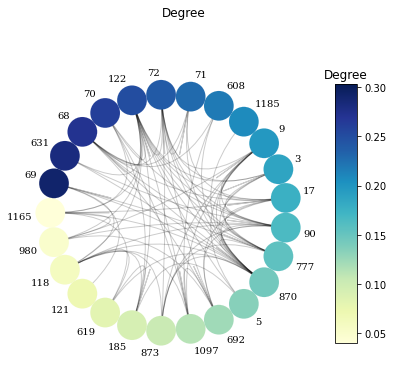

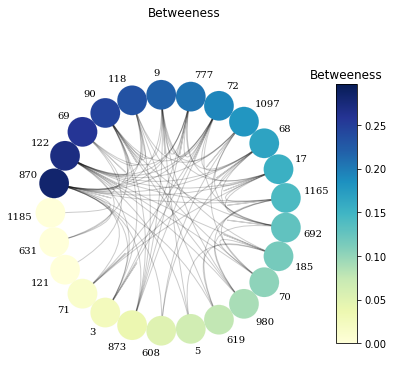

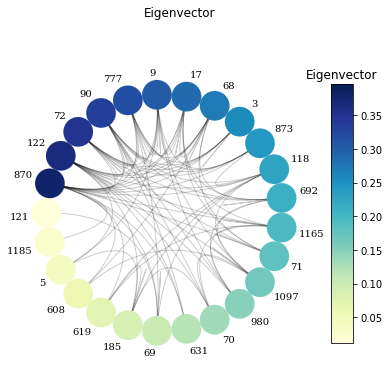

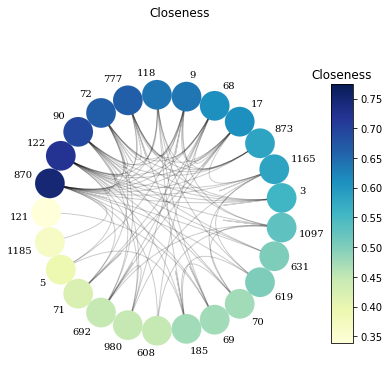

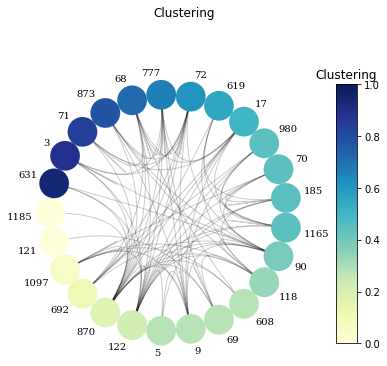

In [ ]:
indexes = ['degree', 'betweeness', 'eigenvector', 'closeness', 'clustering']

for i in indexes:
    current = CircosPlot(H, node_color=i, node_order=i, node_labels=True)
    current.draw()

    plt.title(i.capitalize())
    plt.suptitle(i.capitalize())
    plt.savefig(f"output/{i}.png")